In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [3]:
df = pd.read_csv("BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.shape

(506, 14)

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [13]:
df.rename(columns={'medv':'price'}, inplace = True)
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'price'],
      dtype='object')

**Splitting into training and test datasets**

In [30]:
x = df.iloc[: , : -1]
y= df.iloc[:, -1]

In [31]:
print(x.isnull().sum())  # Count NaNs in each column of `x`
print(y.isnull().sum())  # Count NaNs in `y`

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
dtype: int64
0


In [32]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [33]:
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


**Linear Regression**

In [35]:
lr_regressor = LinearRegression()
mse = cross_val_score(lr_regressor, x, y, scoring='neg_mean_squared_error', cv=5)
mean_mse= np.mean(mse)
mean_mse

-38.98784342151045

**Ridge Regression**

In [41]:
ridge = Ridge()
parameters = {'alpha':[1e-15, 1e-10,1e-8, 1e-3, 1e-2, 1, 2, 3, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100] }
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv = 5)
ridge_regressor.fit(x, y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-30.851313297113045


**Lasso Regression**

In [44]:
lasso = Lasso()
parameters = {'alpha':[1e-15, 1e-10,1e-8, 1e-3, 1e-2, 1, 2, 3, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100] }
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)
lasso_regressor.fit(x, y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.879e+03, tolerance: 3.914e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.250e+03, tolerance: 3.154e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.444e+03, tolerance: 2.941e

{'alpha': 1}
-35.6893167803819


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [46]:
ridge_predict = ridge_regressor.predict(x_test)
lasso_predict = lasso_regressor.predict(x_test)

In [47]:
print(ridge_predict)
print(lasso_predict)

[28.72821597 36.63263239 26.43105884 19.48414041 29.36468953 22.65720191
  0.32370423 40.98127812 24.96886176 29.38561799 20.88141117 22.84469318
 27.91540326 12.31484903 26.23584541 28.1474155  16.01662551 21.11975978
 29.79005507 31.98528079 19.63633251 25.19940504 13.77157411 20.24377479
 17.23831386 15.49508173 15.93024633 16.32021025 24.0347827  28.37636927
 14.29601173 19.92954604 18.32815549 35.17597853 13.46073616 20.23346617
 19.04302356 16.00847582 30.33709297 27.89775295 20.53900226  7.69982275
 13.75199629 35.87960903 21.59379271 25.00941691 22.32773486 20.52238508
 13.9970431  16.55824997 30.75642487 31.04753524 31.86408812 18.41368346
 18.8360941  21.54268024 23.77859427 31.06182594 31.62953765 33.91838535
 26.6986542  17.587025   17.01861893 15.88611777 32.55847981 29.58093772
 22.51090619 15.54728762 32.64800578 19.6411294  12.01691896 17.45219968
  6.23916189  8.72257876 33.09255103 26.57793037 13.6190063  21.23053442
 20.18270538 22.92331437 34.67816639 26.03913214 19

<ipython-input-53-c488b98221a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-ridge_predict)


<Axes: xlabel='price', ylabel='Density'>

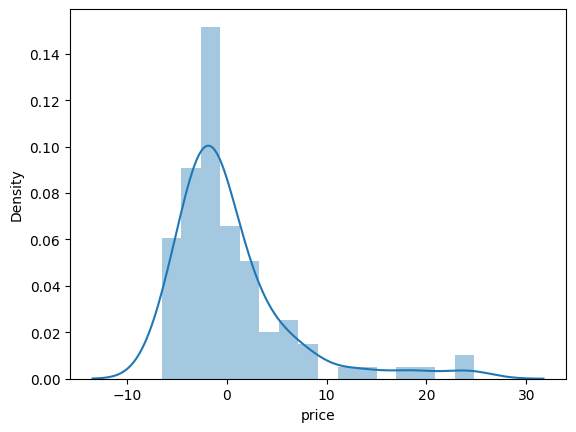

In [53]:
sns.distplot(y_test-ridge_predict)

<ipython-input-54-774ce31fccda>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-lasso_predict)


<Axes: xlabel='price', ylabel='Density'>

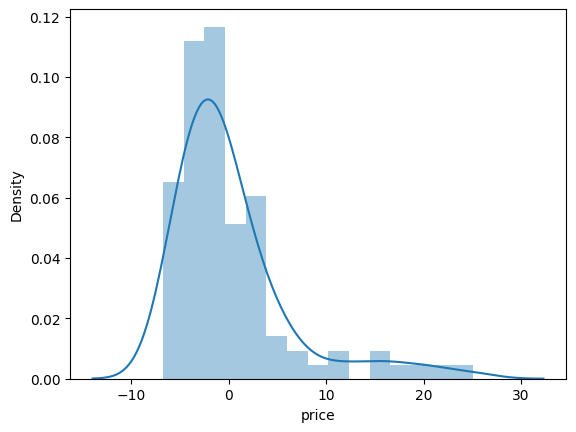

In [54]:
sns.distplot(y_test-lasso_predict)